In [309]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [310]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [311]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Biểu diễn mối quan hệ tương quan giữa tuổi, giá vé và tỉ lệ sống sót

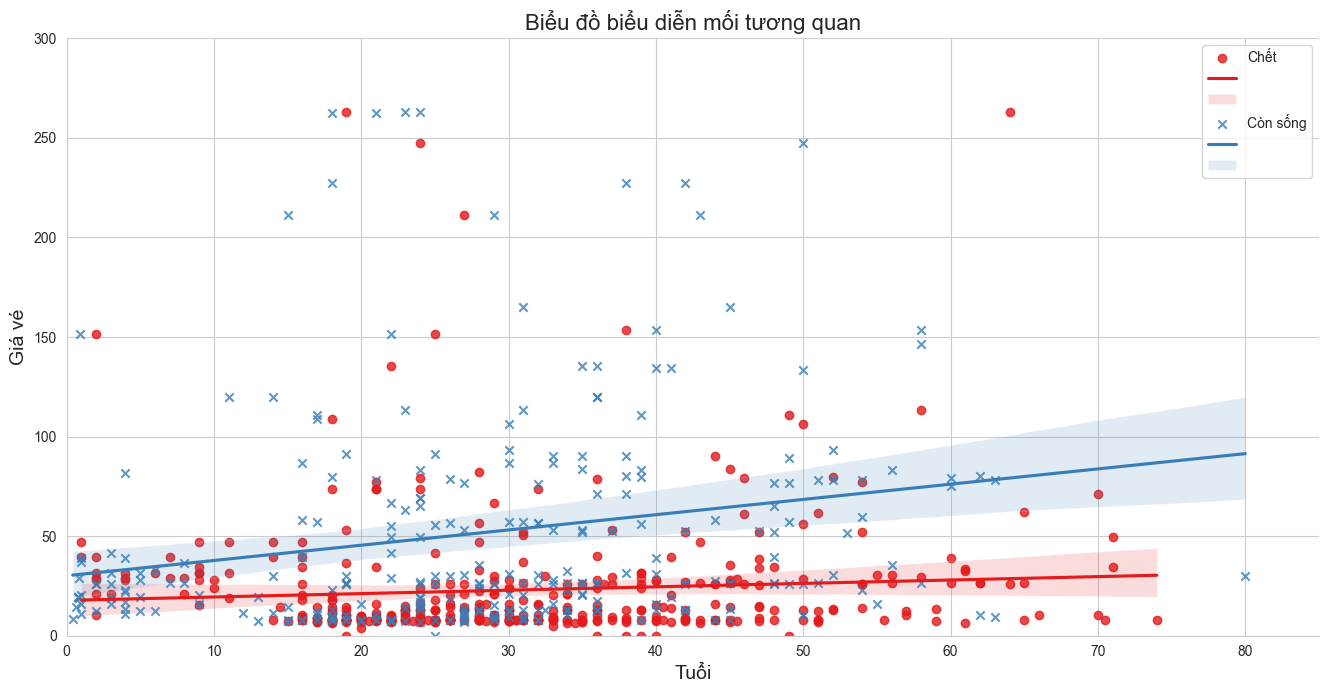

In [312]:
axes = sns.lmplot(x='age',y='fare',hue="survived",data=titanic,markers=["o","x"],palette="Set1",legend=False)
sns.set_style("whitegrid")
plt.title("Biểu đồ biểu diễn mối tương quan",fontsize = 16)
plt.xlabel('Tuổi',fontsize = 14)
plt.ylabel('Giá vé',fontsize = 14)
plt.ylim(0,300)
plt.xlim(0,85)
plt.legend(labels=['Chết',"","",'Còn sống',"",""], loc = 'upper right')
fg = plt.gcf()
fg.set_size_inches(15,7)
plt.show()

- Đa số các hành khách sử dụng vé giá thấp đều đã mất

### Biểu diễn số lượng người sống sót và chết sau sự kiện theo hạng hành khách, giới tính, và nhóm tuổi

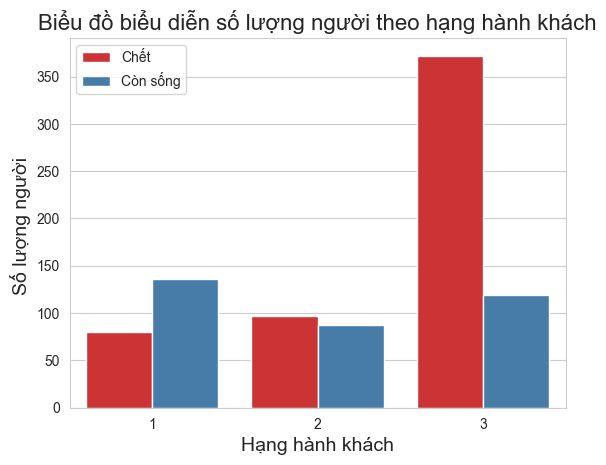

In [313]:
sns.countplot(x='pclass',data=titanic,hue="survived",palette="Set1")
plt.title("Biểu đồ biểu diễn số lượng người theo hạng hành khách",fontsize = 16)
plt.xlabel('Hạng hành khách',fontsize = 14)
plt.ylabel('Số lượng người ',fontsize = 14)
plt.legend(labels=['Chết','Còn sống'], loc = 'upper left')
plt.show()

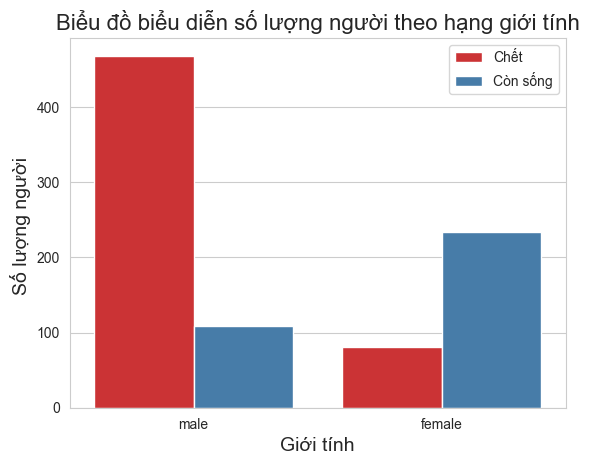

In [314]:
sns.countplot(x='sex',data=titanic,hue="survived",palette="Set1")
plt.title("Biểu đồ biểu diễn số lượng người theo hạng giới tính",fontsize = 16)
# plt.xticks(labels=["Nam giới","Nữ giới"])
plt.xlabel('Giới tính',fontsize = 14)
plt.ylabel('Số lượng người ',fontsize = 14)
plt.legend(labels=['Chết','Còn sống'], loc = 'upper right')
plt.show()

In [315]:
TreEm = (titanic['age']<=18)
NguoiLon = (titanic['age']>18) & (titanic['age']<=35)
TrungNien = (titanic['age']>35)
cons = [TreEm,NguoiLon,TrungNien]
lop = ["Trẻ em","Người lớn","Trung niên"]
titanic["group"] = np.select(cons,lop)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Người lớn
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Trung niên
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Người lớn
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Người lớn
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Người lớn


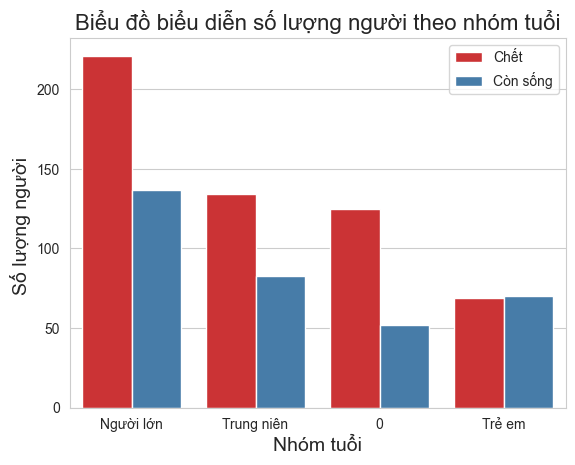

In [316]:
# titanic.dropna(inplace=True)
sns.countplot(x='group',data=titanic,hue="survived",palette="Set1")
plt.title("Biểu đồ biểu diễn số lượng người theo nhóm tuổi",fontsize = 16)
plt.xlabel('Nhóm tuổi',fontsize = 14)
plt.ylabel('Số lượng người ',fontsize = 14)
plt.legend(labels=['Chết','Còn sống'], loc = 'upper right')
plt.show()

- Số lượng người chết nằm tập trung ở hạng 3

- Tỉ lệ nam giới chết nhiều hơn phụ nữ

### Sự phân bố của tuổi hành khách trên tàu (chia theo các nhóm sống/chết, hạng hành khách)

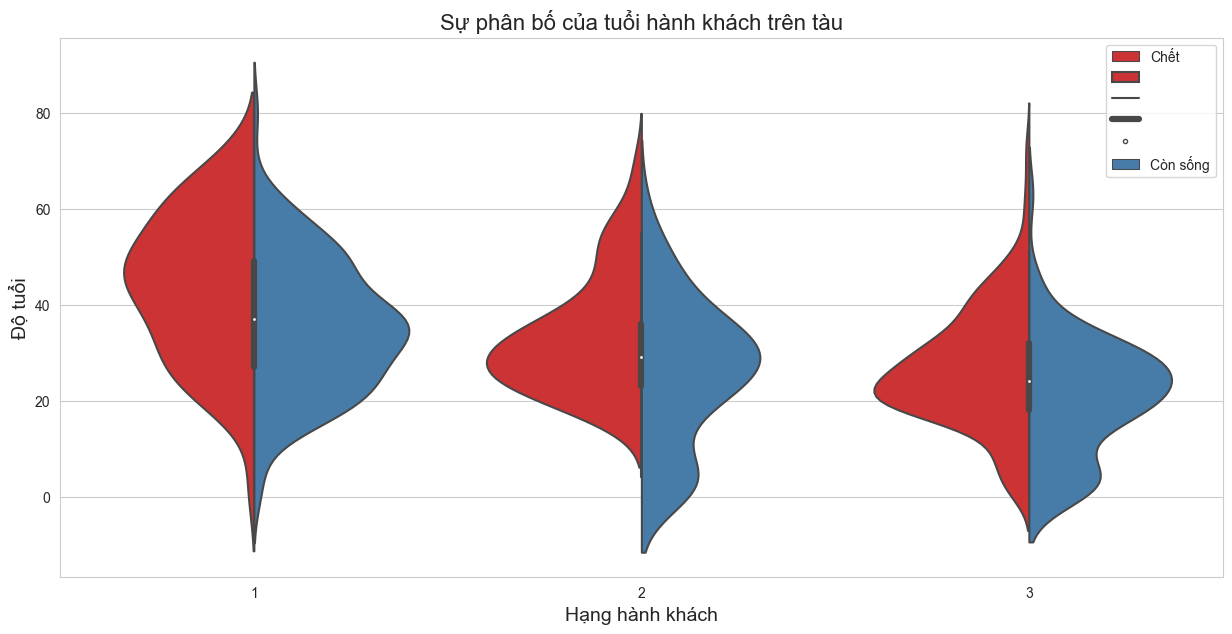

In [317]:
sns.violinplot(x="pclass",y="age",data=titanic,hue="survived",palette="Set1",split=True)
plt.title("Sự phân bố của tuổi hành khách trên tàu",fontsize = 16)
plt.xlabel('Hạng hành khách',fontsize = 14)
plt.ylabel('Độ tuổi',fontsize = 14)
plt.legend(labels=['Chết','',"","","","Còn sống"], loc = 'upper right')
fg = plt.gcf()
fg.set_size_inches(15,7)
plt.show()

- Đa phần tuổi của những người trên tàu nằm ở mức độ 20-40
- Các hành khách hạng 1 có độ tuổi cao hơn từ 30-50

### Biểu diễn mối quan hệ tương quan giữa các cặp thuộc tính trong dữ liệu

In [318]:
# Các hàng các cột là các cột của dữ liệu
# Correlation
corr=titanic.corr()
corr

C:\Users\Admin-s\AppData\Local\Temp\ipykernel_17544\4061737607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=titanic.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot: >

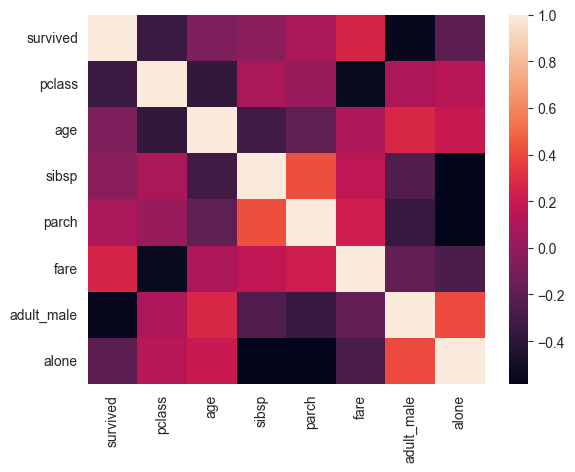

In [319]:
sns.heatmap(corr)

In [331]:
line1 = input()
n,m = line1.split()
line2 = input()
line3 = input()
line4 = input()

_list = line2.split()[0:int(n)]
_ListA = line3.split()[0:int(m)]
_ListB = line4.split()[0:int(m)]
countA = 0
for A in _ListA:
    if A in _list:
        countA +=1

countB = 0
for B in _ListB:
    if B in _list:
        countB +=1

print(countA-countB)

2 1
